<a href="https://colab.research.google.com/github/vtu22710-oi/data-visualization/blob/main/DV_T_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

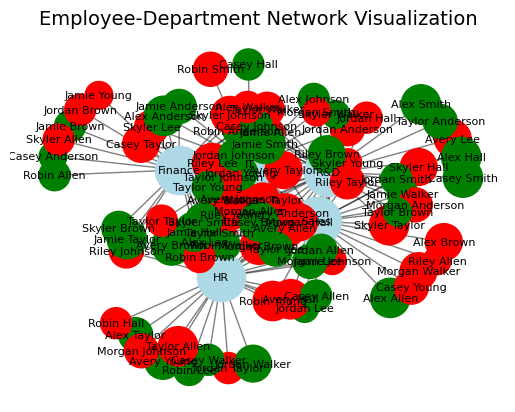

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
file_path = "updated_employee_records_no_name.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Create graph
G = nx.Graph()

# Add department nodes
departments = df['Department'].unique()
for dept in departments:
    G.add_node(dept, type='department')

# Add employee nodes and edges to departments
for _, row in df.iterrows():
    emp_name = row['Name']
    dept = row['Department']

    # Node size based on job level
    job_level = row['JobLevel']

    # Color based on attrition
    attrition = row['Attrition']
    color = 'red' if attrition == 'Yes' else 'green'

    # Add employee node
    G.add_node(
        emp_name,
        type='employee',
        attrition=attrition,
        joblevel=job_level,
        color=color
    )

    # Add edge between employee and department
    G.add_edge(emp_name, dept)

# Positions for layout
pos = nx.spring_layout(G, seed=42)

# Separate department and employee nodes
dept_nodes = [n for n, attr in G.nodes(data=True) if attr['type'] == 'department']
emp_nodes = [n for n, attr in G.nodes(data=True) if attr['type'] == 'employee']

# Colors for employee nodes
emp_colors = [G.nodes[n]['color'] for n in emp_nodes]

# Sizes for employee nodes (based on job level)
emp_sizes = [300 + (G.nodes[n]['joblevel'] * 100) for n in emp_nodes]

# Draw department nodes
nx.draw_networkx_nodes(G, pos, nodelist=dept_nodes, node_color='lightblue', node_size=1200, label='Departments')

# Draw employee nodes
nx.draw_networkx_nodes(G, pos, nodelist=emp_nodes, node_color=emp_colors, node_size=emp_sizes, label='Employees')

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Add title and legend
plt.title("Employee-Department Network Visualization", fontsize=14)
plt.axis('off')
plt.show()
